# Preprocessing

Description: Readying data for for modeling

Next Steps:
- Try LDA & NMF with my genres
- Then try modeling without any genres
- SVD on JUST the genres

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import re

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## One-Hot Encode Genres

In [21]:
songs = pd.read_csv('../data/song_list_v2.csv').set_index('s_song_id')
gs = pd.read_csv('../data/gsong_lookup.csv').set_index('gs_id')

In [22]:
gsg = gs[['song_id', 'genre_name']].set_index('song_id')

In [23]:
genre_dummies = pd.get_dummies(gsg).groupby(['song_id']).sum()

In [24]:
genre_dummies.shape

(21033, 561)

In [25]:
genre_dummies.head()

,genre_name_a cappella,genre_name_acid house,genre_name_acid jazz,genre_name_acoustic blues,genre_name_acoustic pop,genre_name_acoustic punk,genre_name_adult standards,genre_name_african rock,genre_name_album rock,genre_name_albuquerque indie,...,genre_name_vogue,genre_name_west coast rap,genre_name_west coast trap,genre_name_western swing,genre_name_world,genre_name_world worship,genre_name_worship,genre_name_wrestling,genre_name_yugoslav rock,genre_name_zolo
song_id,,,,,,,,,,,,,,,,,,,,,
000xQL6tZNLJzIrtIgxqSl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001wUOgo8t9VElHl45bxzr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003eoIwxETJujVWmNFMoZy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003z5LtGJ2cdJARKIO9LgL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
004S8bMhFQjnbuqvdh6W71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
songs.shape

(22914, 8)

In [26]:
for sid in songs.index:
    if sid not in genre_dummies.index:
        genre_dummies.loc[sid] = 0

In [27]:
genre_dummies.shape

(22914, 561)

In [28]:
genre_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22914 entries, 000xQL6tZNLJzIrtIgxqSl to 2PfrT8OeF0I565L7CRud27
Columns: 561 entries, genre_name_a cappella to genre_name_zolo
dtypes: int64(561)
memory usage: 98.9+ MB


In [29]:
genre_dummies[genre_dummies.isnull().any(1)]

,genre_name_a cappella,genre_name_acid house,genre_name_acid jazz,genre_name_acoustic blues,genre_name_acoustic pop,genre_name_acoustic punk,genre_name_adult standards,genre_name_african rock,genre_name_album rock,genre_name_albuquerque indie,...,genre_name_vogue,genre_name_west coast rap,genre_name_west coast trap,genre_name_western swing,genre_name_world,genre_name_world worship,genre_name_worship,genre_name_wrestling,genre_name_yugoslav rock,genre_name_zolo
song_id,,,,,,,,,,,,,,,,,,,,,


In [31]:
genre_dummies.rename(columns = lambda x: x.replace('genre_name_', 'genre_'), inplace=True)

In [32]:
genre_dummies.to_csv('../data/genre_dummies.csv')

In [2]:
genre_dummies = pd.read_csv('../data/genre_dummies.csv', index_col='song_id')

## One-Hot Encoding Additional Features

I'm going to also one-hot encode the key and time signature features, since despite their numerical represenation, there is not an actual ordinal relationship between them.

In [33]:
main_wfeats = pd.read_csv('../data/main_wfeats.csv', index_col='song_id')

In [34]:
main_wfeats.columns

Index(['Unnamed: 0', 'album_release_date', 'artist_id', 'artist_name',
       'duration_ms', 'explicit', 'linked_album', 'song_title', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'key_changes', 'mean_song_conf', 'mean_loudness', 'mean_mode',
       'mean_mode_conf', 'mean_tempo', 'mean_tempo_conf', 'var_song_conf',
       'var_loudness', 'var_mode', 'var_mode_conf', 'var_tempo',
       'var_tempo_conf', 'tm_dim_1', 'tm_dim_2', 'tm_dim_3', 'tm_dim_4',
       'tm_dim_5', 'tm_dim_6', 'tm_dim_7', 'tm_dim_8', 'tm_dim_9', 'tm_dim_10',
       'tm_dim_11', 'tm_dim_12', 'tv_dim_1', 'tv_dim_2', 'tv_dim_3',
       'tv_dim_4', 'tv_dim_5', 'tv_dim_6', 'tv_dim_7', 'tv_dim_8', 'tv_dim_9',
       'tv_dim_10', 'tv_dim_11', 'tv_dim_12', 'pm_dim_1', 'pm_dim_2',
       'pm_dim_3', 'pm_dim_4', 'pm_dim_5', 'pm_dim_6', 'pm_dim_7', 'pm_dim_8',
       'pm_dim_9', 'pm_dim_10', 'pm_d

In [35]:
main_wfeats.drop('Unnamed: 0', axis=1, inplace=True)

In [36]:
main_wfeats.head()

,album_release_date,artist_id,artist_name,duration_ms,explicit,linked_album,song_title,danceability,energy,key,...,pv_dim_3,pv_dim_4,pv_dim_5,pv_dim_6,pv_dim_7,pv_dim_8,pv_dim_9,pv_dim_10,pv_dim_11,pv_dim_12
song_id,,,,,,,,,,,,,,,,,,,,,
6SluaPiV04KOaRTOIScoff,1995-10-13,6UE7nl9mha6s8z0wFQFIZ2,Robyn,229226.0,False,Robyn Is Here,Show Me Love - Radio Version,0.546,0.643,6,...,0.231588,0.227392,0.365724,0.220462,0.367808,0.267055,0.344281,0.349016,0.323426,0.480299
5qEVq3ZEGr0Got441lueWS,2018-08-10,6S58b0fr8TkWrEHOH4tRVu,Switchfoot,247240.0,False,You Found Me (Unbroken: Path To Redemption),You Found Me (Unbroken: Path To Redemption),0.603,0.802,11,...,0.384941,0.397085,0.465443,0.237421,0.359981,0.209631,0.283483,0.188632,0.212271,0.490470
5kqIPrATaCc2LqxVWzQGbk,2016-04-01,25u4wHJWxCA9vO0CzxAbK7,Lukas Graham,237300.0,False,Lukas Graham,7 Years,0.765,0.473,10,...,0.341671,0.321183,0.195459,0.330539,0.175221,0.328568,0.153059,0.221073,0.444818,0.203276
3aVyHFxRkf8lSjhWdJ68AW,2013-01-01,0C0XlULifJtAgn6ZNCW2eu,The Killers,262000.0,False,Direct Hits,Just Another Girl,0.547,0.779,1,...,0.229995,0.264792,0.180531,0.281061,0.355194,0.189039,0.256742,0.193406,0.253140,0.308046
0zIyxS6QxZogHOpGkI6IZH,2018-09-07,0le01dl1WllSHhjEXRl4in,Tamia,236545.0,False,Passion Like Fire,Deeper,0.438,0.288,9,...,0.233717,0.128174,0.321370,0.200370,0.391387,0.132925,0.265942,0.537358,0.158429,0.266790


##### Time Signature Adjustments from EDA

In [42]:
main_wfeats['time_signature'] = main_wfeats['time_signature'].apply(lambda x: x + 4 if x is 0 else x)

In [43]:
main_wfeats[['key', 'time_signature']] = main_wfeats[['key', 'time_signature']].astype('category', copy=False)

In [44]:
tk_dummies = pd.get_dummies(main_wfeats[['key', 'time_signature']])

In [45]:
main_wfeats = main_wfeats.drop(['key', 'time_signature'], 1).merge(tk_dummies, left_on='song_id', right_on='song_id')

In [46]:
main_wfeats.shape

(22891, 94)

## Merging all One-Hot Encoded Features

In [48]:
main_wfeats = main_wfeats.merge(genre_dummies, left_on='song_id', right_on='song_id')

##### Sanity Check for null values

In [49]:
main_wfeats[main_wfeats.isnull().any(1)]

,album_release_date,artist_id,artist_name,duration_ms,explicit,linked_album,song_title,danceability,energy,loudness,...,genre_vogue,genre_west coast rap,genre_west coast trap,genre_western swing,genre_world,genre_world worship,genre_worship,genre_wrestling,genre_yugoslav rock,genre_zolo
song_id,,,,,,,,,,,,,,,,,,,,,


## Dropping Columns Before Conducting SVD

I'm going to get rid of `duration_ms`, `artist_id`, `artist_name`, `linked_album`, and `song_title` before tossing into SVD.

In [50]:
main_wfeats.drop(['artist_id', 'artist_name', 'duration_ms', 'linked_album', 'song_title'], 1, inplace=True)

In [51]:
main_wfeats['album_release_date'] = main_wfeats['album_release_date'].apply(lambda x: x + '-01-01' if len(x) == 4 else x)
main_wfeats['album_release_date'] = main_wfeats['album_release_date'].apply(lambda x: re.sub(r'(-\d*)','',x))
main_wfeats['album_release_date'] = main_wfeats['album_release_date'].apply(lambda x: int(x))

## Computing SVD | All Features Included

In [53]:
ss = StandardScaler()
main_wfeats_scaled = ss.fit_transform(main_wfeats)
SVD = TruncatedSVD(200)
svd_matrix = SVD.fit_transform(main_wfeats_scaled)

##### Sanity Check for # of Components

In [54]:
svd_matrix.shape

(22891, 200)

### Examining the Explained Variance Ratio through each Component

Text(0,0.5,'variance ratio')

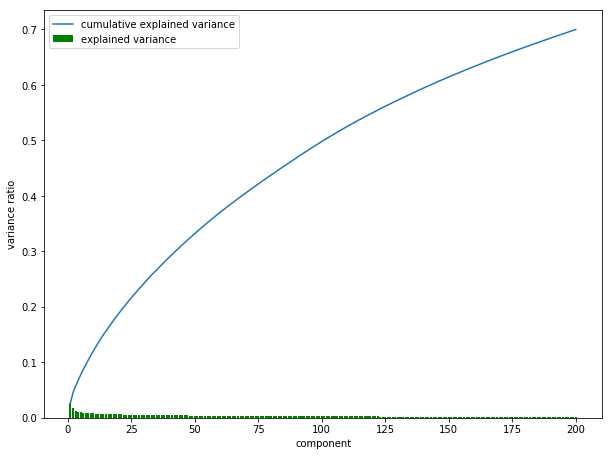

In [58]:
fig = plt.figure(figsize=(10,7.5))
plt.bar(np.array(range(200))+1, 
        SVD.explained_variance_ratio_, 
        color='g', 
        label='explained variance')
plt.plot(np.array(range(200))+1, 
         np.cumsum(SVD.explained_variance_ratio_), 
         label='cumulative explained variance')
plt.legend()
plt.xlabel('component')
plt.ylabel('variance ratio')

Looking deeper:

In [59]:
components_names = ["component_"+str(i+1) for i in range(200)]
svd_df = pd.DataFrame(svd_matrix,
                      columns=components_names)
svd_df.insert(0, 'song_id', main_wfeats.index)
svd_df.set_index('song_id', inplace=True)
svd_df.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_191,component_192,component_193,component_194,component_195,component_196,component_197,component_198,component_199,component_200
song_id,,,,,,,,,,,,,,,,,,,,,
6SluaPiV04KOaRTOIScoff,0.757918,1.404843,-1.913337,-0.472958,0.268357,-1.371433,-1.119114,1.476517,0.979065,-1.521656,...,0.464068,-0.150609,-0.567713,0.125683,-0.669925,-0.052231,-0.472644,0.740681,-0.418329,-0.879269
5qEVq3ZEGr0Got441lueWS,-3.323133,1.920202,-5.114308,-0.452438,-2.890209,0.270954,-5.516297,2.154386,10.550974,2.574092,...,-0.227841,0.228148,-0.143249,0.192309,0.368959,-0.421887,-0.240747,-0.054668,0.599885,-0.305045
5kqIPrATaCc2LqxVWzQGbk,2.732880,-3.548657,-1.923609,-0.168638,0.085750,0.606177,-1.319362,0.284451,-0.691482,-0.654109,...,-3.354644,-1.827297,-5.883545,0.998739,4.821048,-0.980344,0.553223,2.967091,-9.093422,8.490202
3aVyHFxRkf8lSjhWdJ68AW,-3.832698,0.685718,-3.114430,-2.380290,2.386828,-0.414645,0.085730,-0.189485,0.278562,0.392669,...,1.587991,3.303077,1.470967,-2.036976,1.903563,1.833053,1.677840,-1.467334,1.296368,-1.034998
0zIyxS6QxZogHOpGkI6IZH,3.501136,-4.637289,-2.046554,0.929557,0.519125,-1.468985,-4.205319,0.433077,-0.865032,-2.865779,...,-0.007365,0.432226,0.786720,-1.506545,0.520168,-0.172535,-0.729703,-2.145918,0.066724,-1.470035


In [75]:
svd_df.to_csv('../data/svd_df.csv')

### Mapping Song Titles back unto Song ID

In [63]:
loadings = pd.DataFrame(SVD.components_,
                        index=components_names,
                        columns=main_wfeats.columns).T

In [64]:
for col in loadings.columns:
    loadings[f'abs_{col}'] = np.abs(loadings[col])

In [65]:
loadings.shape

(650, 400)

In [78]:
def get_top_loadings(comp_num):
    return loadings.sort_values(f'abs_component_{comp_num}',ascending=False).head(10)[[f'component_{comp_num}']]

In [106]:
get_top_loadings(180)

,component_180
genre_bassline,0.267225
genre_sheffield indie,-0.185839
genre_canadian blues,-0.174316
genre_swamp pop,0.172025
key_7,0.171019
genre_idol,0.162617
genre_canadian punk,0.148993
genre_exotica,0.146930
key_0,-0.139129
genre_underground rap,0.138937


In [67]:
loadings.sort_values('abs_component_1',ascending=False).head(10)[['component_1']].T

,tv_dim_11,tm_dim_11,tm_dim_10,tv_dim_10,tm_dim_8,tv_dim_8,tm_dim_4,tv_dim_4,tm_dim_6,tv_dim_6
component_1,0.201596,0.201596,0.201175,0.201175,0.198804,0.198804,0.198531,0.198531,0.19058,0.19058


In [68]:
loadings.sort_values('abs_component_2',ascending=False).head(10)[['component_2']].T

,energy,acousticness,pv_dim_2,pm_dim_2,mean_loudness,loudness,pm_dim_7,pv_dim_7,pv_dim_9,pm_dim_9
component_2,0.244124,-0.195062,0.176836,0.176836,0.172692,0.16494,0.154629,0.154629,0.148244,0.148244


In [77]:
loadings.sort_values('abs_component_3',ascending=False).head(10)[['component_3']].T

,genre_classic rock,genre_album rock,genre_mellow gold,genre_folk rock,genre_soft rock,album_release_date,genre_southern rock,genre_art rock,genre_blues-rock,genre_roots rock
component_3,0.244124,0.219,0.208467,0.207704,0.192774,-0.181759,0.181531,0.181044,0.175666,0.172679


In [69]:
loadings.sort_values('abs_component_5', ascending=False).head(10)[['component_5']]

,component_5
genre_indie rock,0.220666
genre_indie pop,0.218757
genre_indie folk,0.183267
genre_modern rock,0.177045
genre_chamber pop,0.171118
genre_stomp and holler,0.168916
genre_country,-0.157677
genre_garage rock,0.150193
genre_indietronica,0.145115
genre_neo-psychedelic,0.143012


Timbre tells the story of the most important component, though the feature importance of the other 199 components is almost entirely made up of the genres associated with the song's performing artist.

**ADD MORE** TK

##### Exporting `svd_matrix` for calculating Cosine similarity

In [74]:
with open('../pickle/svd_matrix.pkl', 'wb') as f:
    pickle.dump(svd_matrix, f)

## Computing SVD | Just Genres

Since genres are so influential within each component, and since the genre's are directly tied to artists and not to individual songs, the song recommendations computed through the original SVD matrix often feature the same artist as the one who performed the song given. Even if we account for the performing artist, and only recommend songs that *aren't* from the artist, the resulting recommendations are quite homogenous with regard to the performing artists shown.

In order to account for this level of homogeneity, and recommend more song titles that don't come from the same 2-3 artists, we'll try and compute SVD for just the genres. The thought is if we can truncate the number of features reserved for genres significantly, the cosine similarity between titles will be more influenced by the actual audio features . 

In [103]:
len(genre_dummies.columns)

561

##### Creating Truncated SVD with 20 Genre Components

In [115]:
SVDg = TruncatedSVD(20)
svd_g = SVDg.fit_transform(genre_dummies)

#### Looking at the Explained Variance Ratio

Text(0,0.5,'variance ratio')

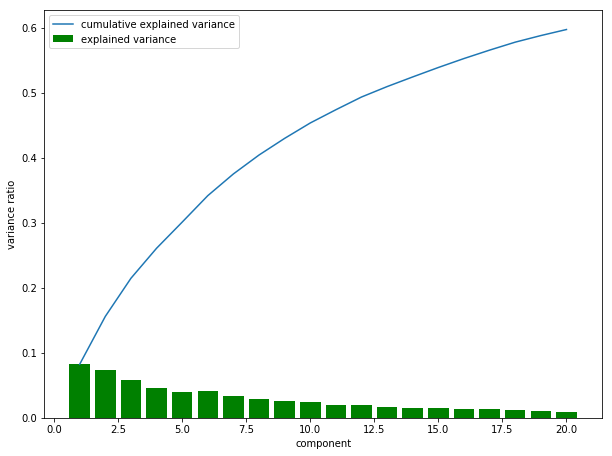

In [116]:
fig = plt.figure(figsize=(10,7.5))
plt.bar(np.array(range(20))+1, 
        SVDg.explained_variance_ratio_, 
        color='g', 
        label='explained variance')
plt.plot(np.array(range(20))+1, 
         np.cumsum(SVDg.explained_variance_ratio_), 
         label='cumulative explained variance')
plt.legend()
plt.xlabel('component')
plt.ylabel('variance ratio')

In [118]:
component_names = ["component_"+str(i+1) for i in range(20)]
svd_dfg = pd.DataFrame(svd_g,
                      columns=component_names)
svd_dfg.insert(0, 'song_id', genre_dummies.index)
svd_dfg.set_index('song_id', inplace=True)
svd_dfg.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14,component_15,component_16,component_17,component_18,component_19,component_20
song_id,,,,,,,,,,,,,,,,,,,,
000xQL6tZNLJzIrtIgxqSl,0.034297,0.518050,0.053728,0.244043,0.257615,-0.868571,-0.223612,0.074650,-0.680127,0.821565,-0.206928,-0.057648,0.142904,-0.057835,0.398555,0.110447,-0.003149,-0.060518,-0.070412,-0.082623
001wUOgo8t9VElHl45bxzr,0.122199,2.031721,0.938150,-0.035598,-0.062283,0.161413,0.356463,-0.039822,0.528456,-0.632918,0.099124,0.068759,-0.172694,-0.021309,0.439829,0.075144,-0.044450,0.001148,0.105677,0.514341
003eoIwxETJujVWmNFMoZy,0.049012,0.806849,0.210583,0.302995,0.323582,-1.145095,-0.147424,0.107309,-0.507196,0.723824,-0.150021,-0.066804,0.162174,-0.047570,0.319234,0.101763,-0.008547,-0.054167,-0.057252,-0.150245
003z5LtGJ2cdJARKIO9LgL,0.754805,-0.008302,-0.122599,1.967591,0.204409,0.516368,-0.155146,0.224087,0.014918,-0.157294,0.053406,0.024636,-0.093837,0.182050,-0.051286,-0.118510,-0.323779,-0.437210,-0.205200,-0.021381
004S8bMhFQjnbuqvdh6W71,0.422349,0.008751,0.069751,-0.120760,-0.047869,-0.066237,-0.632697,-0.322295,0.336340,0.206080,-0.160609,0.085804,-0.197283,-0.123167,-0.011457,-0.029192,-0.208524,0.327646,-0.231032,-0.107704


In [120]:
loadings_g = pd.DataFrame(SVDg.components_,
                        index=component_names,
                        columns=genre_dummies.columns).T

In [121]:
for col in loadings_g.columns:
    loadings_g[f'abs_{col}'] = np.abs(loadings_g[col])

In [122]:
loadings.shape

(561, 20)

In [123]:
def get_top_loadings(comp_num):
    return loadings_g.sort_values(f'abs_component_{comp_num}',ascending=False).head(10)[[f'component_{comp_num}']]

In [132]:
get_top_loadings(10)

,component_10
genre_pop,0.368894
genre_pop rock,-0.265816
genre_dance pop,0.250864
genre_folk-pop,-0.227019
genre_post-teen pop,0.201842
genre_new jack swing,-0.201310
genre_modern rock,-0.163744
genre_folk,-0.155157
genre_neo soul,-0.154488
genre_disco,0.152861


#### Adding in Other Song Features for Modeling Ready DataFrame

In [134]:
main_songs = pd.read_csv('../data/main_wfeats.csv', index_col='song_id')

In [135]:
main_songs.columns

Index(['Unnamed: 0', 'album_release_date', 'artist_id', 'artist_name',
       'duration_ms', 'explicit', 'linked_album', 'song_title', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'key_changes', 'mean_song_conf', 'mean_loudness', 'mean_mode',
       'mean_mode_conf', 'mean_tempo', 'mean_tempo_conf', 'var_song_conf',
       'var_loudness', 'var_mode', 'var_mode_conf', 'var_tempo',
       'var_tempo_conf', 'tm_dim_1', 'tm_dim_2', 'tm_dim_3', 'tm_dim_4',
       'tm_dim_5', 'tm_dim_6', 'tm_dim_7', 'tm_dim_8', 'tm_dim_9', 'tm_dim_10',
       'tm_dim_11', 'tm_dim_12', 'tv_dim_1', 'tv_dim_2', 'tv_dim_3',
       'tv_dim_4', 'tv_dim_5', 'tv_dim_6', 'tv_dim_7', 'tv_dim_8', 'tv_dim_9',
       'tv_dim_10', 'tv_dim_11', 'tv_dim_12', 'pm_dim_1', 'pm_dim_2',
       'pm_dim_3', 'pm_dim_4', 'pm_dim_5', 'pm_dim_6', 'pm_dim_7', 'pm_dim_8',
       'pm_dim_9', 'pm_dim_10', 'pm_d

In [136]:
main_songs.drop(['Unnamed: 0', 'album_release_date',
                 'artist_id', 'artist_name', 'duration_ms',
                 'linked_album', 'song_title'], 1, inplace=True)

In [138]:
main_songs.shape

(22891, 74)

In [140]:
scale_songs = StandardScaler()
main_songs_svd = main_songs.merge(svd_dfg, left_on='song_id', right_on='song_id')
main_songs_scaled_svd = scale_songs.fit_transform(main_songs_svd)

##### Pickling Song Listing for Calculating Cosine Similarity

In [141]:
with open('../data/main_songs_scaled_svd.pkl', 'wb') as f:
    pickle.dump(main_songs_scaled_svd, f)

In [142]:
svd_dfg.to_csv('../data/svd_dfg.csv')